1. Find the total DSH payments each state receives in total in 2011 (aggregated from all hospitals for the state).

2. Find the numbers for year 2015.

3. Find how much DSH payments has increased in each state ((2) - (1)).
4. Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)
5. Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments (which makes sense since DSH payments covers uncompensated care caused by uninsured individuals, and under Medicaid expansion there should be fewer uninsured people in these states)

*repeat process for 2011 vs 2013 and compare results

In [1]:
#importing necessary libraries for data cleaning + analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading necessary csvs of dsh from years 2011, 2013, and 2015
dsh_2011 = pd.read_csv('dsh_2011.csv')
dsh_2013 = pd.read_csv('dsh_2013.csv')
dsh_2015 = pd.read_csv('dsh_2015.csv')

In [3]:
#peeking top of the datasets
dsh_2011.head(5)

#provider is a unique number that represents a hospital
dsh_2011['provider'].describe()

#dsh1 is the Disproportionate Share Adjustment by the Hospital
dsh_2011['dsh1'].describe()

count    2.770000e+03
mean     4.160372e+06
std      6.292669e+06
min      1.130000e+02
25%      5.791325e+05
50%      1.794492e+06
75%      5.158310e+06
max      9.999199e+07
Name: dsh1, dtype: float64

In [4]:
#for each important year, we grouped by the state and took the dsh column
#we then took the sum of each column to represent aggregate from all hospitals of a state
#after each sum, we renamed the dsh column with respective years 

dsh_2011_aggregate = dsh_2011.groupby('state')['dsh1'].sum().reset_index()
dsh_2011_aggregate = dsh_2011_aggregate.rename(columns = {"dsh1": "dsh_2011"})

dsh_2013_aggregate = dsh_2013.groupby('state')['dsh1'].sum().reset_index()
dsh_2013_aggregate = dsh_2013_aggregate.rename(columns = {"dsh1": "dsh_2013"})

dsh_2015_aggregate = dsh_2015.groupby('state')['dsh1'].sum().reset_index()
dsh_2015_aggregate = dsh_2015_aggregate.rename(columns = {"dsh1": "dsh_2015"})

#this option just formats the displays of floats cleaner
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [5]:
#full join datasets from 2011 and 2013
dsh_all_aggregate = pd.merge(dsh_2011_aggregate, dsh_2013_aggregate, on = ['state'])

In [6]:
#full join previous generated dataset and 2015
dsh_all_aggregate = pd.merge(dsh_all_aggregate, dsh_2015_aggregate, on = ['state'])

In [17]:
dsh_all_aggregate

,state,dsh_2011,dsh_2013,dsh_2015,2015-2011,2013-2011
0,AK,17737577,23197983,8362462,-9375115,5460406
1,AL,186843384,134225015,43686403,-143156981,-52618369
2,AR,107615594,75153804,38929726,-68685868,-32461790
3,AZ,174554622,102341838,55650089,-118904533,-72212784
4,CA,1766073387,1183158254,570486495,-1195586892,-582915133
5,CO,78478115,64168931,37370322,-41107793,-14309184
6,CT,124683945,97188936,36930686,-87753259,-27495009
7,DC,68884646,35152157,19094285,-49790361,-33732489
8,DE,35418499,18458850,12426150,-22992349,-16959649
9,FL,785288570,618161727,194898300,-590390270,-167126843


Find how much DSH payments has increased in each state ((2) - (1)).

In [8]:
#adding a column of the difference from 2015-2011
dsh_all_aggregate['2015-2011'] = dsh_all_aggregate['dsh_2015'] - dsh_all_aggregate['dsh_2011']

In [9]:
#adding a column of the difference from 2013-2011
dsh_all_aggregate['2013-2011'] = dsh_all_aggregate['dsh_2013'] - dsh_all_aggregate['dsh_2011']

In [10]:
#drop states with 0 values including GU, and VI
dsh_all_aggregate_clean = dsh_all_aggregate[(dsh_all_aggregate!=0).all(1)].reset_index()

In [11]:
dsh_all_aggregate_clean

,index,state,dsh_2011,dsh_2013,dsh_2015,2015-2011,2013-2011
0,0,AK,17737577,23197983,8362462,-9375115,5460406
1,1,AL,186843384,134225015,43686403,-143156981,-52618369
2,2,AR,107615594,75153804,38929726,-68685868,-32461790
3,3,AZ,174554622,102341838,55650089,-118904533,-72212784
4,4,CA,1766073387,1183158254,570486495,-1195586892,-582915133
5,5,CO,78478115,64168931,37370322,-41107793,-14309184
6,6,CT,124683945,97188936,36930686,-87753259,-27495009
7,7,DC,68884646,35152157,19094285,-49790361,-33732489
8,8,DE,35418499,18458850,12426150,-22992349,-16959649
9,9,FL,785288570,618161727,194898300,-590390270,-167126843


Label each state as "expansion states" or "non-expansion states", according to whether they decided to expand Medicaid following the Affordable Care Act. (Have I send you the list of expansion states?)

In [12]:
#read in expansion states table to append column to previous df
expansion_states = pd.read_csv('expansion_states.csv')

In [14]:
#remove white space in state
dsh_all_aggregate_clean['state'] = dsh_all_aggregate_clean['state'].str.strip()

In [15]:
#merging expansion status to previous data frame
dsh_and_states = pd.merge(dsh_all_aggregate_clean, expansion_states, on = ['state'], how = 'outer')

In [20]:
dsh_and_states.set_index('index')

,state,dsh_2011,dsh_2013,dsh_2015,2015-2011,2013-2011,expansion_status
index,,,,,,,
0,AK,17737577,23197983,8362462,-9375115,5460406,1
1,AL,186843384,134225015,43686403,-143156981,-52618369,0
2,AR,107615594,75153804,38929726,-68685868,-32461790,1
3,AZ,174554622,102341838,55650089,-118904533,-72212784,1
4,CA,1766073387,1183158254,570486495,-1195586892,-582915133,1
5,CO,78478115,64168931,37370322,-41107793,-14309184,1
6,CT,124683945,97188936,36930686,-87753259,-27495009,1
7,DC,68884646,35152157,19094285,-49790361,-33732489,1
8,DE,35418499,18458850,12426150,-22992349,-16959649,1


**2015-2011** Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 

In [26]:
from sklearn.linear_model import LogisticRegression

X = dsh_and_states["2015-2011"].values.reshape(-1,1)
y = dsh_and_states["expansion_status"].values

log_reg = LogisticRegression()
log_reg.fit(X, y)

/mnt/c/Users/kerim/GitHub/cmp_indstudy_ml/research/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

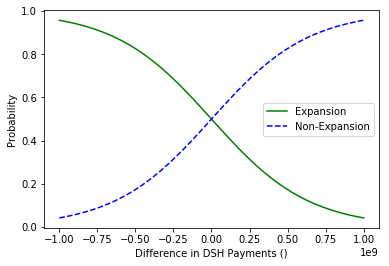

In [49]:
X_new = np.linspace(-1000000000, 1000000000, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Expansion")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Non-Expansion")
plt.xlabel("Difference in DSH Payments ()")
plt.ylabel("Probability")
plt.legend()

**2013 - 2011**
Use a logistic regression model to describe the relation between DSH increase and expansion/non-expansion. Is there a strong correlation? If so, it may support the argument that Medicaid expansion helped reduce the DSH payments 

In [44]:
from sklearn.linear_model import LogisticRegression

X = dsh_and_states["2013-2011"].values.reshape(-1,1)
y = dsh_and_states["expansion_status"].values

log_reg = LogisticRegression()
log_reg.fit(X, y)

/mnt/c/Users/kerim/GitHub/cmp_indstudy_ml/research/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

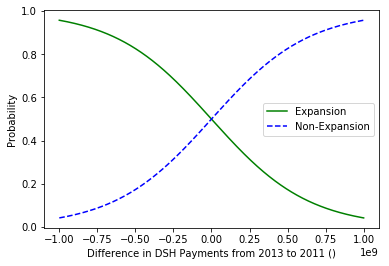

In [55]:
X_new = np.linspace(-1000000000, 1000000000, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Expansion")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Non-Expansion")
plt.xlabel("Difference in DSH Payments from 2013 to 2011 ()")
plt.ylabel("Probability")
plt.legend()